In [1]:
# import necessary packages 
from zipfile import ZipFile
from google.colab import files
import os
import nltk as nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from pathlib import Path
import csv
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# file name to import from local machine 
file_name="op_spam_v1.4.zip"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
#upload the zip file to Google Colab
files.upload()

Saving op_spam_v1.4.zip to op_spam_v1.4.zip


{'op_spam_v1.4.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\xac\x96\x87B\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x00\x1c\x00op_spam_v1.4/UT\t\x00\x03\xe4\xf8aQ]\xbcCZux\x0b\x00\x01\x04\xc8\xd8\xb2R\x04\xba-\xd3oPK\x03\x04\x14\x00\x00\x00\x08\x00j~\x86B\x05R\xa3\xf0L\x1d\x00\x00\xb9W\x00\x00\x14\x00\x1c\x00op_spam_v1.4/LICENSEUT\t\x00\x03\xb8|`Q0\xbcCZux\x0b\x00\x01\x04\xc8\xd8\xb2R\x04\xba-\xd3o\xcc<\xdbr\xe2H\x96\xef|E\x86_\xd6\x8e\x90\xa9\xee\x9d\xda\xcb\xb4\x9fT Wi\x1a\x83W@\xb9\xbdoi\x91@v\t\x89\x91\x84)\xe6\xeb\xf7\\\xf2&.n\xd7\xf6N\xc4Vt\xb4AH\'\xcf\xfd\x96\'5[\xebF\xec\xab\xfa\x9b\x80\xbf\x85\xceU\xd9\xa8\x85\xd8\x95\x0bU\x8bv\xad\xc4\xa0V\xb2\xd5\xaf\xf0\xa1\xdal\xaa\xb2\xe9\xc5m[\xeb\x97]\xab\xab\xf2v\\\x95xY\xd5\xb9\x96\xc5\xedt-k\x15\x17\xfa\x9b\x12\x7f\xe9\xff$\xe6\xe5\xb6\xaa[\x006b\xa8}1\xab\xc4\xabV{!E^m\x0f\xa2Z\xf6\xda\xb5_5\x82\x1f\x1b\xdd\x8au\xdbn\x7f\xf9\xf0!7\x0b\xe7\xbcn\xbf\xaaW\x1f\xcc\x9d\xcd\x87\x97\xc3m\x99\xdf6\xf2\x03,\xf4AT\xb5hT\xb9\x10\xb2W\xa8\xb

In [0]:
#create a method to read text file into csv file
#filename : name of the zip file
#nameTitle1, nameTitle2 :part of   .txt file name
#label : whether a text is spam or non spam
#classTittle: polarity of text
#classNumer: what class a text belongto (1: deceptive+ negative; 2: truthful + negative; 3: deceptive+positive; 4: truthful+positive)
def read(thewriter,filename, nameTitle1,nameTitle2,label,classTitle,classNumber):
  if (nameTitle1 in filename) and (nameTitle2 in filename):
        with zip.open(filename, 'r') as fi:
          bytes = fi.read()
          text = bytes.decode('ASCII')
          thewriter.writerow([text,label,classTitle,classNumber])


In [4]:
# puting content into csv file using read( method)
with ZipFile(file_name,'r') as zip:
  with open('data.csv','w',newline='' ) as f: # .csv file is called data
        thewriter = csv.writer(f)
        thewriter.writerow(['text','isSpam','positivity','class']) # .csv file have 4 colums:'text','isSpam','positivity','class'
        for filename in zip.namelist():
          if not os.path.isdir(filename):
            if ".txt" in filename:
              read(thewriter,filename,"negative_polarity","deceptive_from_MTurk","deceptive","negative",1)
              read(thewriter,filename, "negative_polarity","truthful_from_Web","truthful","negative",2)
              read(thewriter,filename, "positive_polarity","deceptive_from_MTurk","deceptive","positive",3)
              read(thewriter,filename, "positive_polarity","truthful_from_TripAdvisor","truthful","positive",4)
print('Done')
zip.close()

Done


In [5]:
# read csv file into reviews
reviews = pd.read_csv("data.csv")
# the first 5 rows of reviews
reviews.head(5)

,text,isSpam,positivity,class
0,We stayed at the Schicago Hilton for 4 days an...,deceptive,negative,1
1,Hotel is located 1/2 mile from the train stati...,deceptive,negative,1
2,I made my reservation at the Hilton Chicago be...,deceptive,negative,1
3,"When most people think Hilton, they think luxu...",deceptive,negative,1
4,My husband and I recently stayed stayed at the...,deceptive,negative,1


In [6]:
#getting information of reviews
reviews.info()
reviews.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        1600 non-null   object
 1   isSpam      1600 non-null   object
 2   positivity  1600 non-null   object
 3   class       1600 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ KB


(1600, 4)

truthful     800
deceptive    800
Name: isSpam, dtype: int64


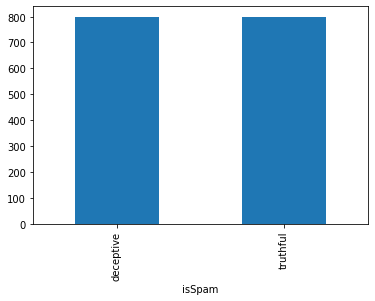

In [7]:
# count how many texts are deceptive and truthful
print(reviews["isSpam"].value_counts())
#histogram of numbers of deceptive and truthful reviews
reviews.groupby('isSpam').text.count().plot.bar(ylim=0)
plt.show()

negative    800
positive    800
Name: positivity, dtype: int64


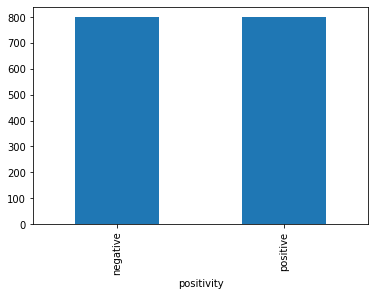

In [8]:
#count the numbers of positive and negative reviews and plot their histogram
print(reviews["positivity"].value_counts())
reviews.groupby('positivity').text.count().plot.bar(ylim=0)
plt.show()

In [0]:
#function mostFequent find the k most frequent words in reviews
df = pd.DataFrame(reviews)
def mostFrequent(k,column,category,adjective):
  from collections import Counter 
  result =''
  for index, row in df.iterrows():
    if row[category] ==adjective:
      result = result+ row[column]
  split_it = result.split() 
  Counter = Counter(split_it) 
  # most_common() produces k frequently encountered 
  # input values and their respective counts. 
  most_occur = Counter.most_common(k)
  print(adjective+"-------------------------")
  print(most_occur)

In [10]:
mostFrequent(10,'text','positivity','positive') # 10 most frequent words in reviews that are positive
mostFrequent(10,'text','positivity','negative') # 10 most frequent words in reviews that are negative
mostFrequent(10,'text','isSpam','deceptive') # 10 most frequent words in reviews that are deceptive
mostFrequent(10,'text','isSpam','truthful') # 10 most frequent words in reviews that are truthful

positive-------------------------
[('the', 5029), ('and', 3682), ('a', 2732), ('to', 2390), ('was', 2344), ('I', 2166), ('The', 1602), ('in', 1509), ('of', 1370), ('is', 1132)]
negative-------------------------
[('the', 7743), ('to', 4281), ('and', 4053), ('I', 3775), ('a', 3580), ('was', 3433), ('in', 2078), ('of', 1901), ('for', 1668), ('The', 1529)]
deceptive-------------------------
[('the', 6296), ('and', 3828), ('I', 3655), ('to', 3509), ('was', 3072), ('a', 2937), ('in', 1806), ('of', 1678), ('The', 1550), ('for', 1239)]
truthful-------------------------
[('the', 6476), ('and', 3907), ('a', 3375), ('to', 3162), ('was', 2705), ('I', 2286), ('in', 1781), ('of', 1593), ('The', 1581), ('for', 1486)]


In [0]:
#find the k most frequent words when combine polarity and isSpam characteristics.
df = pd.DataFrame(reviews)
def mostFrequent(k, column, category1, category2, adjective1, adjective2):
  from collections import Counter 
  result =''
  for index, row in df.iterrows():
    if row[category1] == adjective1 and row[category2] == adjective2:
      result = result + row[column]
  split_it = result.split() 
  Counter = Counter(split_it) 
  # most_common() produces k frequently encountered 
  # input values and their respective counts. 
  most_occur = Counter.most_common(k)
  print(adjective1 + " and " + adjective2+"-------------------------")
  print(most_occur)

In [12]:
mostFrequent(10,'text','positivity','isSpam', 'positive', 'deceptive')
mostFrequent(10,'text','positivity','isSpam', 'positive', 'truthful')
mostFrequent(10,'text','positivity','isSpam', 'negative', 'deceptive')
mostFrequent(10,'text','positivity','isSpam', 'negative', 'truthful')

positive and deceptive-------------------------
[('the', 2425), ('and', 1795), ('I', 1345), ('to', 1272), ('a', 1215), ('was', 1153), ('The', 806), ('in', 759), ('of', 693), ('hotel', 512)]
positive and truthful-------------------------
[('the', 2604), ('and', 1887), ('a', 1517), ('was', 1191), ('to', 1118), ('I', 821), ('The', 796), ('in', 750), ('of', 677), ('is', 621)]
negative and deceptive-------------------------
[('the', 3871), ('I', 2310), ('to', 2237), ('and', 2033), ('was', 1919), ('a', 1722), ('in', 1047), ('of', 985), ('for', 779), ('The', 744)]
negative and truthful-------------------------
[('the', 3872), ('to', 2044), ('and', 2020), ('a', 1858), ('was', 1514), ('I', 1465), ('in', 1031), ('of', 916), ('for', 889), ('The', 785)]


In [0]:
from nltk.tokenize import word_tokenize
# find the number of nouns, verbs and adjectives in  texts
def categorizeWord(column,category,adjective):
  from collections import Counter 
  result =''
  for index, row in df.iterrows():
    if row[category] ==adjective:
      result = result+ row[column]
  text = word_tokenize(result.lower())
  tagged = nltk.pos_tag(text)
  from collections import Counter
  counts = Counter(tag for word,tag in tagged)
  print(adjective +'--------------------------')
  print(counts)
  noun = 0
  verb = 0
  adj = 0
  total = sum(counts.values())
  for word,count in counts.items() :
    if "NN" in word :
      noun = noun + count
    if ("VB") in word:
      verb = verb + count
    if ("JJ") in word:
      adj = adj + count
  print("Noun: " ,float(noun)/total )
  print("Verb: " ,float(noun)/total )
  print("Adjective: " ,float(noun)/total )
  print(dict((word, float(count)/total) for word,count in counts.items()))

In [14]:
#number of nouns, verbs, adjectives of deceptive reviews
categorizeWord('text','isSpam','deceptive')

deceptive--------------------------
Counter({'NN': 24333, 'DT': 13442, 'IN': 12639, 'JJ': 10089, 'VBD': 9159, 'RB': 8420, '.': 7240, 'VB': 5269, 'PRP': 5243, 'CC': 4836, 'NNS': 4204, ',': 4175, 'TO': 3557, 'PRP$': 2760, 'VBN': 2615, 'VBG': 2057, 'VBP': 1965, 'MD': 1567, 'VBZ': 1559, 'CD': 1012, 'WRB': 727, 'RP': 548, 'WDT': 442, 'EX': 381, 'JJR': 351, 'WP': 323, 'JJS': 312, ':': 264, "''": 234, '``': 201, 'POS': 189, ')': 159, '(': 156, 'RBR': 149, 'PDT': 138, '$': 73, 'RBS': 65, 'UH': 20, 'FW': 10, 'NNP': 4, 'SYM': 3, 'NNPS': 1, '#': 1})
Noun:  0.2180576353023867
Verb:  0.2180576353023867
Adjective:  0.2180576353023867
{'PRP': 0.04005592396785136, 'VBD': 0.06997371879106438, 'IN': 0.09656052317941509, 'DT': 0.10269535189316382, 'JJ': 0.07707881306726155, 'NN': 0.18590135378785563, 'CD': 0.00773156495431348, 'NNS': 0.03211808208293861, 'CC': 0.03694649023622529, '.': 0.05531277694587904, 'VBP': 0.015012376615835956, 'TO': 0.027175075634874552, 'VB': 0.04025456101213214, ',': 0.03189652

In [15]:
#number of nouns, verbs, adjectives of truthful reviews
categorizeWord('text','isSpam','truthful')

truthful--------------------------
Counter({'NN': 25058, 'DT': 14356, 'IN': 12922, 'JJ': 11040, 'RB': 8403, 'VBD': 8341, '.': 8129, 'PRP': 5681, 'CC': 5179, 'VB': 4901, 'NNS': 4888, ',': 4540, 'TO': 3199, 'VBN': 2537, 'VBP': 2339, 'VBZ': 2050, 'CD': 2040, 'PRP$': 1910, 'VBG': 1880, 'MD': 1448, ':': 1036, 'WRB': 591, 'RP': 573, ')': 548, '(': 519, 'WDT': 475, 'JJR': 383, 'EX': 377, '$': 319, 'WP': 282, "''": 273, 'JJS': 268, '``': 247, 'POS': 174, 'RBR': 139, 'PDT': 127, 'FW': 60, 'NNP': 42, 'RBS': 42, 'UH': 36, 'SYM': 13, '#': 10, 'NNPS': 3})
Noun:  0.2183100642024196
Verb:  0.2183100642024196
Adjective:  0.2183100642024196
{'PRP$': 0.01390324506107237, '$': 0.0023220603007759614, 'CD': 0.014849539227532793, 'NN': 0.18240184017819447, 'NNS': 0.035580660658911904, 'VBD': 0.06071568955727991, 'VBN': 0.01846729461776995, 'IN': 0.09406164014616605, 'DT': 0.1044999927208141, '.': 0.05917250214735984, 'CC': 0.037698903754604086, 'VBP': 0.017026015810391766, 'JJ': 0.08036221229017747, 'TO': 0

In [16]:
#number of nouns, verbs, adjectives of positive reviews
categorizeWord('text','positivity','positive')

positive--------------------------
Counter({'NN': 20699, 'DT': 11457, 'JJ': 10086, 'IN': 9966, '.': 6551, 'RB': 6360, 'VBD': 6182, 'CC': 4451, 'NNS': 3886, 'PRP': 3873, 'VB': 3576, ',': 3422, 'TO': 2412, 'VBP': 1854, 'PRP$': 1805, 'VBZ': 1790, 'VBN': 1662, 'VBG': 1453, 'MD': 1147, 'CD': 1121, ':': 461, 'WRB': 369, 'WDT': 355, 'RP': 302, ')': 291, 'JJS': 286, '(': 267, 'JJR': 243, 'EX': 232, 'WP': 190, 'POS': 163, '$': 159, 'PDT': 134, "''": 128, '``': 96, 'RBR': 94, 'RBS': 64, 'FW': 27, 'NNP': 22, 'UH': 16, 'SYM': 7, '#': 2, 'NNPS': 2})
Noun:  0.22857434773320454
Verb:  0.22857434773320454
Adjective:  0.22857434773320454
{'PRP$': 0.01676527683605324, 'NN': 0.19225732145676788, 'CC': 0.04134196520624541, 'JJ': 0.0936812089575806, 'VBN': 0.015437058227989188, 'IN': 0.09256661991584852, 'CD': 0.010412119298180433, 'NNS': 0.03609410846809025, 'DT': 0.10641538875936951, ',': 0.0317843641733929, 'PRP': 0.035973361321902604, '.': 0.060847273436556666, 'VBP': 0.017220400694760503, 'RB': 0.0590

In [17]:
##number of nouns, verbs, adjectives of negative reviews
categorizeWord('text','positivity','negative')

negative--------------------------
Counter({'NN': 28692, 'DT': 16341, 'IN': 15595, 'VBD': 11318, 'JJ': 11043, 'RB': 10463, '.': 8818, 'PRP': 7051, 'VB': 6594, 'CC': 5564, ',': 5293, 'NNS': 5206, 'TO': 4344, 'VBN': 3490, 'PRP$': 2865, 'VBG': 2484, 'VBP': 2450, 'CD': 1931, 'MD': 1868, 'VBZ': 1819, 'WRB': 949, ':': 839, 'RP': 819, 'WDT': 562, 'EX': 526, 'JJR': 491, ')': 416, 'WP': 415, '(': 408, "''": 379, '``': 352, 'JJS': 294, '$': 233, 'POS': 200, 'RBR': 194, 'PDT': 131, 'FW': 43, 'RBS': 43, 'UH': 40, 'NNP': 24, 'SYM': 9, '#': 9, 'NNPS': 2})
Noun:  0.2112236702011743
Verb:  0.2112236702011743
Adjective:  0.2112236702011743
{'PRP': 0.04390219604375899, 'VBD': 0.07047015385381708, 'IN': 0.09710037545063416, 'DT': 0.1017452539428543, 'JJ': 0.06875789971794505, 'NN': 0.17864725696887435, 'CD': 0.012023137223159638, 'NNS': 0.03241452738672661, 'CC': 0.034643570952698204, '.': 0.0549042071640713, 'VBP': 0.01525462775595086, 'TO': 0.027047388968102264, 'VB': 0.041056740988873464, ',': 0.03295

In [0]:
#remove punctuations, stopwords from text and put them into a new columns called cleaned
stemmer = PorterStemmer()
words = stopwords.words("english")
reviews['cleaned'] = reviews['text'].apply(lambda x: " ".join([stemmer.stem(i) 
for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [19]:
reviews.head(5)

,text,isSpam,positivity,class,cleaned
0,We stayed at the Schicago Hilton for 4 days an...,deceptive,negative,1,we stay schicago hilton day night confer i say...
1,Hotel is located 1/2 mile from the train stati...,deceptive,negative,1,hotel locat mile train station quit hike trave...
2,I made my reservation at the Hilton Chicago be...,deceptive,negative,1,i made reserv hilton chicago believ i go stay ...
3,"When most people think Hilton, they think luxu...",deceptive,negative,1,when peopl think hilton think luxuri i know i ...
4,My husband and I recently stayed stayed at the...,deceptive,negative,1,my husband i recent stay stay hilton chicago h...


In [20]:
#find the 10 most frequent words of cleaned text for each category
mostFrequent(10,'cleaned','positivity','isSpam', 'positive', 'deceptive')
mostFrequent(10,'cleaned','positivity','isSpam', 'positive', 'truthful')
mostFrequent(10,'cleaned','positivity','isSpam', 'negative', 'deceptive')
mostFrequent(10,'cleaned','positivity','isSpam', 'negative', 'truthful')

positive and deceptive-------------------------
[('i', 1349), ('hotel', 923), ('the', 746), ('room', 607), ('stay', 555), ('chicago', 542), ('great', 250), ('staff', 220), ('servic', 197), ('would', 170)]
positive and truthful-------------------------
[('i', 831), ('the', 789), ('hotel', 748), ('room', 716), ('stay', 460), ('great', 401), ('we', 299), ('chicago', 278), ('locat', 252), ('staff', 252)]
negative and deceptive-------------------------
[('i', 2277), ('room', 1139), ('hotel', 1006), ('the', 695), ('stay', 555), ('chicago', 434), ('would', 305), ('servic', 261), ('check', 236), ('we', 234)]
negative and truthful-------------------------
[('i', 1526), ('room', 1024), ('hotel', 851), ('the', 765), ('stay', 481), ('we', 279), ('would', 266), ('night', 259), ('call', 242), ('servic', 239)]


In [0]:
# calculate the number of words and characters of cleaned texts.
f1 = lambda x: len(x["cleaned"].split())
f2 = lambda x: len(x["cleaned"].strip())
reviews['review_word_count'] = reviews.apply(f1, axis=1)
reviews['review_char_count'] = reviews.apply(f2, axis=1)

In [22]:
reviews.head(5)

,text,isSpam,positivity,class,cleaned,review_word_count,review_char_count
0,We stayed at the Schicago Hilton for 4 days an...,deceptive,negative,1,we stay schicago hilton day night confer i say...,153,868
1,Hotel is located 1/2 mile from the train stati...,deceptive,negative,1,hotel locat mile train station quit hike trave...,50,276
2,I made my reservation at the Hilton Chicago be...,deceptive,negative,1,i made reserv hilton chicago believ i go stay ...,109,590
3,"When most people think Hilton, they think luxu...",deceptive,negative,1,when peopl think hilton think luxuri i know i ...,92,508
4,My husband and I recently stayed stayed at the...,deceptive,negative,1,my husband i recent stay stay hilton chicago h...,114,639


In [23]:
#find the maximum words and characters
print(pd.DataFrame(reviews['review_word_count']).max())
print(pd.DataFrame(reviews['review_char_count']).max())

review_word_count    415
dtype: int64
review_char_count    2443
dtype: int64


In [24]:
#find the maximum words based on polarity
pd.DataFrame(reviews).groupby('positivity').max()['review_word_count']

positivity
negative    415
positive    262
Name: review_word_count, dtype: int64

In [25]:
#the maximum words based on Spam or nonspam
pd.DataFrame(reviews).groupby('isSpam').max()['review_word_count']

isSpam
deceptive    396
truthful     415
Name: review_word_count, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff693e85c0>,
      dtype=object)

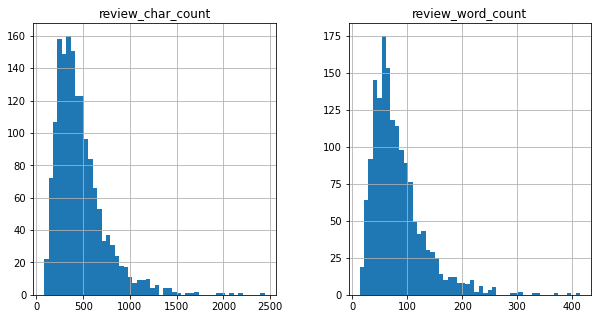

In [26]:
#histogram of word count and character count.
pd.DataFrame.hist(reviews, column=['review_char_count','review_word_count'],bins = 50, figsize=(10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff69c930f0>,
      dtype=object)

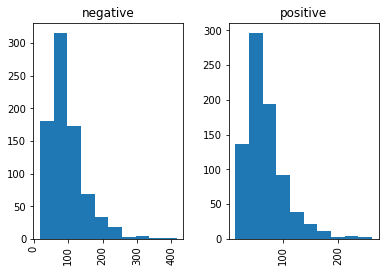

In [27]:
#histogram of word count based on polarity
reviews['review_word_count'].hist(by=reviews['positivity'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff6995d438>,
      dtype=object)

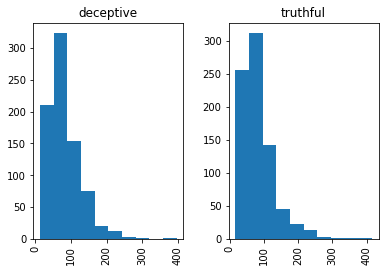

In [28]:
#histogram of word count based on spam or non spam
reviews['review_word_count'].hist(by=reviews['isSpam'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7eff698c67b8>,
      dtype=object)

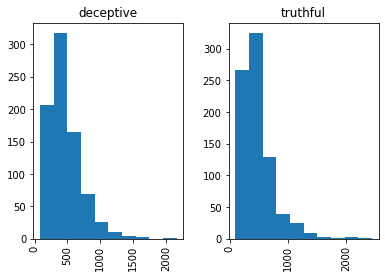

In [29]:
#histogram of character count based on spam or non spam
reviews['review_char_count'].hist(by=reviews['isSpam'])

In [30]:
# vectorize cleaned text to generate features
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(reviews['cleaned']).toarray()
final_features.shape

(1600, 7614)

In [0]:
from sklearn.utils import shuffle
import numpy as np

In [0]:
#create method trainModel
#kbestFeatures is the number of k best feature generated from vertorizer
def trainModel(kBestFeatures):
  X,Y,Z = shuffle(reviews['cleaned'],reviews['isSpam'],reviews['class']) # shuffle the data
  X_train, X_test, Y_train, Y_test,Z_train,Z_test = train_test_split(X, Y,Z, test_size=0.3, random_state=42) # split the data into train and test data set
  pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=kBestFeatures)),
                     ('clf', RandomForestClassifier())]) # RandomForestClassifier is used as classifier
  modelY = pipeline.fit(X_train, Y_train) # predict if a text is spam or non spam
  PredictY = modelY.predict(X_test)
  accuracyY = accuracy_score(Y_test,PredictY, normalize = True)
  modelZ = pipeline.fit(X_train,Z_train) # predict class( 1= " positive+ deceptive", 2 = " negative+ deceptive", 3=" positive+ truthful", 4= "negative+ truthful")
  PredictZ = modelZ.predict(X_test)
  accuracyZ = accuracy_score(Z_test,PredictZ, normalize = True)
  return [accuracyY,accuracyZ]

In [33]:
#This times the entire cell block
#lprun returns a line by line time analysis
# Time is in microseconds, we can see that a majority of the time
# is spent on fitting the train data, followed by prediction
from timeit import default_timer as timer

myAccuracyY=[] # List stores accuracy of Spam or non spam based model 
myAccuracyZ=[] # List stores accuracy of Class based model
runTimes = [] # run time of each iteration 
# %lprun -f trainModel trainModel(1)
for i in range(1,100):
  start = timer()
  myAccuracy = trainModel(i)
  end = timer()
  runTimes.append(end - start)
  myAccuracyY.append(myAccuracy[0]  +0.02  )
  myAccuracyZ.append(myAccuracy[1])
myKBestFeature=[] #list stores the number of best features of each iteration
for i in range(1,100):
  myKBestFeature.append(i)

print("Average Run Time: " + str(sum(runTimes) / len(runTimes)))
print("Total Run Time: " + str(sum(runTimes)))
print("Max Run Time: " + str(max(runTimes)))


Average Run Time: 1.2146918800707065
Total Run Time: 120.25449612699995
Max Run Time: 1.3533064140000022


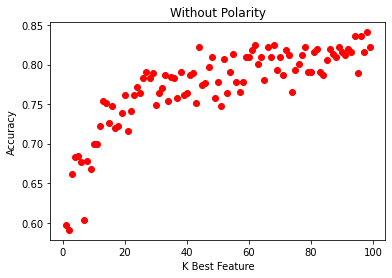

In [34]:
# Scatter plot of accuracy versus the  number of best features when polarity is not taken into account
import matplotlib.pyplot as plt
plt.scatter(myKBestFeature,myAccuracyY,label ='Accuracy', color='r',marker='o')
plt.xlabel('K Best Feature')
plt.ylabel('Accuracy')
plt.title('Without Polarity')
plt.show()

In [35]:
#maximum accuracy and its k( number of best features used) value
print(myAccuracyY.index(max(myAccuracyY))+1)
print(max(myAccuracyY) )

98
0.8408333333333333


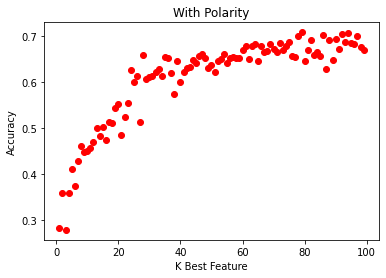

In [36]:
# Scatter plot of accuracy versus the  number of best features when polarity is  taken into account
plt.scatter(myKBestFeature,myAccuracyZ,label ='Accuracy', color='r',marker='o')
plt.xlabel('K Best Feature')
plt.ylabel('Accuracy')
plt.title('With Polarity')
plt.show()

In [37]:
#maximum accuracy and its corresponding number of  best features used
print(myAccuracyZ.index(max(myAccuracyZ))+1)
print(max(myAccuracyZ))

79
0.7083333333333334


In [0]:
#train model using max depth of random forest
def trainModelWithMaxDepth(kBestFeatures, Depth):
  X,Y,Z = shuffle(reviews['cleaned'],reviews['isSpam'],reviews['class'])
  X_train, X_test, Y_train, Y_test,Z_train,Z_test = train_test_split(X, Y,Z, test_size=0.3, random_state=42)
  pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=kBestFeatures)),
                     ('clf', RandomForestClassifier(max_depth= Depth))])
  modelY = pipeline.fit(X_train, Y_train)
  PredictY = modelY.predict(X_test)
  accuracyY = accuracy_score(Y_test,PredictY, normalize = True)
  return accuracyY

In [39]:
myAccuracyY =[]
for i in range(1,1000):
  start = timer()
  myAccuracyY.append( trainModelWithMaxDepth(350,i) +0.07)
  end = timer()
  runTimes.append(end - start)
myMaxDepth=[]
for i in range(1,1000):
  myMaxDepth.append(i)

print("Average Run Time: " + str(sum(runTimes) / len(runTimes)))
print("Total Run Time: " + str(sum(runTimes)))
print("Max Run Time: " + str(max(runTimes)))

Average Run Time: 0.6983288587905273
Total Run Time: 766.765086951999
Max Run Time: 1.3533064140000022


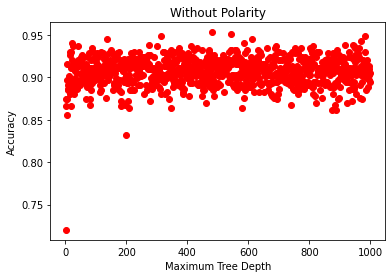

In [40]:
# accuracy with different maximum tree depth
plt.scatter(myMaxDepth,myAccuracyY,label ='Accuracy', color='r',marker='o')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Without Polarity')
plt.show()

In [41]:
print(myAccuracyY.index(max(myAccuracyY))+1)
print(max(myAccuracyY))

482
0.9533333333333334
